# **Tanpa Adanya Hambatan Udara**

## 1. Inisiasi Variabel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# initialization
x = 0                                 # initial x position
y = 0                                 # initial y position
v0 = 50                               # initial velocity
angle = 35                            # initial angle
angle_rad = (angle/360)*(2 * np.pi)   # convert degree to radian
g = -9.806                            # gravity acceleration
t = 0                                 # time
dt = 0.01                             # time step

## 2. Inisiasi Array

In [2]:
# initialization array
x_arr = [x]
y_arr = [y]
t_arr = [t]

# velocity for x and y axis
vx = v0 * np.cos(angle_rad)
vy = v0 * np.sin(angle_rad)

## 3. Update

In [3]:
# update
while y >= 0:
    vy += g*dt
    y += vy*dt
    x += vx*dt
    t += dt
    if y < 0:
        break
    # store
    x_arr.append(x)
    y_arr.append(y)
    t_arr.append(t)

## 4. Solusi Numerik

In [4]:
# numerical solution
# total time
t_tot_num = t_arr[-1]
# range
range_num = x_arr[-1]
# max height
h_max_num = np.max(y_arr)

## 5. Solusi Analitik

In [5]:
# exact solution
x_ex_arr = [0]
y_ex_arr = [0]
for t in t_arr:
    x_ex = v0 * np.cos(angle_rad) * t
    y_ex = (0.5 * g * t**2) + (v0 * np.sin(angle_rad) * t)
    x_ex_arr.append(x_ex)
    y_ex_arr.append(y_ex)

# total time
t_tot_ex = (2 * v0 * np.sin(angle_rad))/-g
# range
range_ex = v0 * np.cos(angle_rad) * t_tot_ex
# max height
h_max_ex = (v0**2 * np.sin(angle_rad)**2) / (-2 * g)

## 6. Visualisasi Validasi Posisi

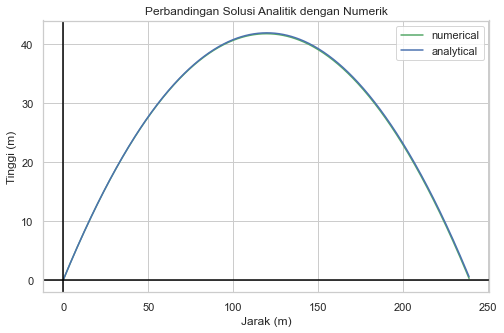

In [7]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))

sns.lineplot(x=x_arr, y=y_arr, color='g', label='numerical')
sns.lineplot(x=x_ex_arr, y=y_ex_arr, color='b', label='analytical')
plt.axhline(c='black')
plt.axvline(c='black')

plt.title('Perbandingan Solusi Analitik dengan Numerik')
plt.xlabel("Jarak (m)")
plt.ylabel("Tinggi (m)")
plt.legend()

plt.show()

## 7. Validasi Waktu

In [ ]:
# compare
print('Numerik vs Analitik')
print('total waktu (s): {:.2f} vs {:.2f}'.format(t_tot_num, t_tot_ex))
print('Jarak (m) {:.2f} vs {:.2f}'.format(range_num, range_ex))
print('Tinggi (m) {:.2f} vs {:.2f}'.format(h_max_num, h_max_ex))

Numerik vs Analitik
total waktu (s): 5.83 vs 5.85
Jarak (m) 238.78 vs 239.57
Tinggi (m) 41.79 vs 41.94


## 8. Pembuatan Simulasi

In [ ]:
# plot for animation
plt.rcParams.update({'figure.max_open_warning': 0})
for i in range(len(y_arr)):
    plt.figure()
    plt.scatter(x_arr[i], y_arr[i], marker='o', c='b')
    plt.text(32, 14, '{:.2f} s'.format(t_arr[i]))
    plt.ylim(-1,16)
    plt.xlim(-1,36)
    plt.axhline(c='black')
    plt.axvline(c='black')
    plt.savefig('./images/fig_{:04d}.png'.format(i+1), 
                format='png', dpi=1000, bbox_inches="tight")

# **Dengan Hambatan Udara**

## 1. Inisiasi Variabel Menggunakan Hambatan Udara

In [10]:
# initialization
m = 0.15                              # Massa Benda
d = 0.0013                            # konstanta
x = 0                                 # initial x position
y = 0                                 # initial y position
v0 = 50                               # initial velocity
angle = 35                            # initial angle
angle_rad = (angle/360)*(2 * np.pi)   # convert degree to radian
g = -9.806                            # gravity acceleration
t = 0                                 # time
dt = 0.01                             # time step

## 2. Inisiasi Array Menggunakan Hambatan Udara

In [11]:
# initialization array
x_arr = [x]
y_arr = [y]
t_arr = [t]

# velocity for x and y axis
vx = v0 * np.cos(angle_rad)
vy = v0 * np.sin(angle_rad)

## 3. Update Menggunakan Hambatan Udara

In [12]:
# update
while y >= 0:
    v = sqrt((vx**2) + (vy**2))
    ax = - (d/m) * v * vx
    ay = g - (d/m) * v *vy
    vy += ay*dt
    vx += ax*dt
    y += vy*dt
    x += vx*dt
    t += dt
    if y < 0:
        break
    # store
    x_arr.append(x)
    y_arr.append(y)
    t_arr.append(t)

## 4. Solusi Numerik Menggunakan Hambatan Udara

In [13]:
# numerical solution
# total time
t_tot_num = t_arr[-1]
# range
range_num = x_arr[-1]
# max height
h_max_num = np.max(y_arr)

## 5. Visualisasi Validasi Posisi Menggunakan Hambatan Udara

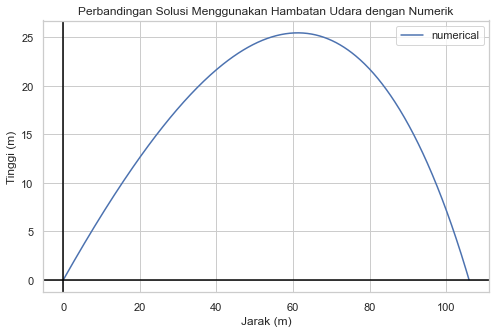

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))

sns.lineplot(x=x_arr, y=y_arr, color='b', label='numerical')
plt.axhline(c='black')
plt.axvline(c='black')

plt.title('Perbandingan Solusi Menggunakan Hambatan Udara dengan Numerik')
plt.xlabel("Jarak (m)")
plt.ylabel("Tinggi (m)")
plt.legend()

plt.show()

## 6. Validasi Waktu Menggunakan Hambatan Udara

In [15]:
print('Numerik Menggunakan Hambatan Udara')
print('total waktu (s): {:.2f}'.format(t_tot_num))
print('Jarak (m) {:.2f}'.format(range_num))
print('Tinggi (m) {:.2f}'.format(h_max_num))

Numerik Menggunakan Hambatan Udara
total waktu (s): 4.51
Jarak (m) 106.00
Tinggi (m) 25.45


## 7. Pembuatan Simulasi Menggunakan Hambatan Udara

In [ ]:
# plot for animation
plt.rcParams.update({'figure.max_open_warning': 0})
for i in range(len(y_arr)):
    plt.figure()
    plt.scatter(x_arr[i], y_arr[i], marker='o', c='r')
    plt.text(32, 14, '{:.2f} s'.format(t_arr[i]))
    plt.ylim(-1,16)
    plt.xlim(-1,36)
    plt.axhline(c='black')
    plt.axvline(c='black')
    plt.savefig('./images2/fig_{:04d}.png'.format(i+1), 
                format='png', dpi=1000, bbox_inches="tight")